
# 📊 Análise Estatística de Partidas da NBA

**Integrantes:**  
- João Pedro de Oliveira Ribas  
- Vinicius Ferraz do Nascimento  
- Samuel Victor Fernandes Dantas Vicente

---

# 📋 Introdução

**O projeto tem como objetivo a coleta, organização e análise de dados estatísticos de partidas da NBA. A motivação central é compreender, a partir de métricas específicas, o desempenho das equipes em diferentes momentos dos jogos e identificar padrões que possam influenciar os resultados das partidas.**

**Por meio da análise de variáveis como aproveitamento de arremessos, número de turnovers, liderança no placar, entre outras, buscamos extrair insights relevantes sobre o comportamento das equipes. Através de métodos estatísticos, correlações e técnicas de regressão, serão investigadas relações entre diferentes fatores de desempenho e seus impactos nos resultados finais.**

**Além disso, este projeto visa consolidar o uso de ferramentas de coleta automatizada de dados e análise exploratória, fortalecendo a capacidade de transformar grandes volumes de informação esportiva em conhecimento estratégico.**




## 🗂️ Dados Usados

O dataset utilizado neste relatório foi gerado a partir da extração das estatísticas de todas as partidas da temporada da NBA. Cada linha do arquivo representa um evento (lance) ocorrido em um dos períodos do jogo (`1Q`, `2Q`, `3Q`, `4Q`, `OT1`, etc.), com as seguintes colunas principais:

| Coluna             | Descrição                                                                                  |
|--------------------|--------------------------------------------------------------------------------------------|
| **Data**           | Data da partida (DD/MM/AAAA)                                                               |
| **Hora**           | Hora de início da partida (HH:MM)                                                          |
| **Mês**            | Mês em que a partida foi disputada                                                         |
| **Tipo fase**      | Indica se a partida faz parte da *Regular Season* ou dos *Playoffs*                        |
| **Fase**           | Nome da rodada ou fase (ex.: “Eastern conference first round”)                             |
| **Time Casa**      | Nome da equipe mandante                                                                    |
| **Time Visitante** | Nome da equipe visitante                                                                   |
| **Resultado**      | Resultado final da partida (`Vitória Casa` / `Vitória Visitante` / `Empate`)               |
| **Periodo**        | Período do jogo em que ocorreu o lance (`ALL`, `1Q`, `2Q`, `3Q`, `4Q`, `OT1`, etc.)        |
| **Categoria**      | Categoria geral do lance (`Scoring`, `Others`, `Lead`)                                     |
| **Lance**          | Tipo específico de evento (ex.: `Free throws`, `2 pointers`, `Turnovers`, etc.)            |
| **Dados da Casa**  | Valor ou texto formatado dos dados do time da casa (ex.: `3/4 (75%)`, `12`)                |
| **Dados do Visitante** | Valor ou texto formatado dos dados do time visitante                                   |


In [1]:

import pandas as pd

# Carregar o dataset
df = pd.read_excel('NBA_Temporada_2024.xlsx')

# Visualizar as primeiras linhas
print("Prévia dos dados:")
display(df.head())

# Verificar dimensão e tipos de dados
print("Dimensão do DataFrame:", df.shape)
print("\nInformações gerais:")
display(df.info())

# Estatísticas descritivas de colunas numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Número de partidas únicas
n_partidas = df[['Data', 'Time Casa', 'Time Visitante']].drop_duplicates().shape[0]
print(f"\nNúmero de partidas únicas: {n_partidas}")


Prévia dos dados:


,Data,Hora,Mês,Tipo fase,Time Casa,Time Visitante,Resultado,Periodo,Categoria,Lance,Dados da Casa,Dados do Visitante
0,22/10/2024,20:30,Outubro,regularSeason,Boston Celtics,New York Knicks,Vitória Casa,ALL,Scoring,Score,132,109
1,22/10/2024,20:30,Outubro,regularSeason,Boston Celtics,New York Knicks,Vitória Casa,ALL,Scoring,Free throws,7/8 (87%),12/16 (75%)
2,22/10/2024,20:30,Outubro,regularSeason,Boston Celtics,New York Knicks,Vitória Casa,ALL,Scoring,2 pointers,19/34 (55%),32/48 (66%)
3,22/10/2024,20:30,Outubro,regularSeason,Boston Celtics,New York Knicks,Vitória Casa,ALL,Scoring,3 pointers,29/61 (47%),11/30 (36%)
4,22/10/2024,20:30,Outubro,regularSeason,Boston Celtics,New York Knicks,Vitória Casa,ALL,Scoring,Field goals,48/95 (50%),43/78 (55%)


Dimensão do DataFrame: (94395, 12)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94395 entries, 0 to 94394
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                94395 non-null  object
 1   Hora                94395 non-null  object
 2   Mês                 94395 non-null  object
 3   Tipo fase           94395 non-null  object
 4   Time Casa           94395 non-null  object
 5   Time Visitante      94395 non-null  object
 6   Resultado           94395 non-null  object
 7   Periodo             94395 non-null  object
 8   Categoria           94395 non-null  object
 9   Lance               94395 non-null  object
 10  Dados da Casa       94395 non-null  object
 11  Dados do Visitante  94395 non-null  object
dtypes: object(12)
memory usage: 8.6+ MB


None


Estatísticas descritivas:


,Data,Hora,Mês,Tipo fase,Time Casa,Time Visitante,Resultado,Periodo,Categoria,Lance,Dados da Casa,Dados do Visitante
count,94395,94395,94395,94395,94395,94395,94395,94395,94395,94395,94395,94395
unique,166,27,7,1,30,30,2,7,3,18,3180,3153
top,13/04/2025,21:00,Março,regularSeason,Indiana Pacers,Brooklyn Nets,Vitória Casa,ALL,Other,Score,2,2
freq,1200,18617,18390,94395,3252,3252,51278,19666,49689,6211,5538,5605



Número de partidas únicas: 1226


# 🛠️ Pré-processamento

**O conjunto de dados foi obtido já em formato estruturado, com as informações devidamente categorizadas e limpas.
As etapas de pré-processamento realizadas foram mínimas, limitando-se a:**

* **Conversão de colunas para os tipos adequados (por exemplo, data/hora para datetime e valores numéricos para inteiros).**

* **Remoção de espaços em branco nos nomes das colunas, se necessário.**

* **Filtragem de partidas que chegaram à prorrogação (OT), para análises específicas.**

***Essas transformações garantiram que o dataset estivesse pronto para a realização de análises estatísticas e gráficas sem a necessidade de limpeza adicional complexa.***



# 1️⃣ Qual time tem o melhor aproveitamento de arremessos (Field Goals) nos períodos decisivos (4Q e OT)?


### 💻 CÓDIGO


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def extrair_porcentagem(texto):
    if pd.isna(texto):
        return None
    if '(' in str(texto) and '%' in str(texto):
        try:
            percentual = str(texto).split('(')[1].split('%')[0]
            return float(percentual)
        except:
            return None
    return None

z
# =========== | Variáveis | ============ #
periodos_decisivos = ['4Q', 'OT1', 'OT2', 'OT3', 'OT4', 'OT5']
df = pd.read_excel('NBA_Temporada_2024.xlsx')

# =========== | Principal | ============ #
df_decisivos = df[df['Periodo'].isin(periodos_decisivos)]
df_field_goals = df_decisivos[df_decisivos['Lance'] == 'Field goals']

df_field_goals['Aproveitamento_Casa'] = df_field_goals['Dados da Casa'].apply(extrair_porcentagem)
df_field_goals['Aproveitamento_Visitante'] = df_field_goals['Dados do Visitante'].apply(extrair_porcentagem)

df_casa = df_field_goals[['Time Casa', 'Aproveitamento_Casa']].rename(columns={'Time Casa': 'Time', 'Aproveitamento_Casa': 'Aproveitamento'})
df_visitante = df_field_goals[['Time Visitante', 'Aproveitamento_Visitante']].rename(columns={'Time Visitante': 'Time', 'Aproveitamento_Visitante': 'Aproveitamento'})

df_final = pd.concat([df_casa, df_visitante])
df_final = df_final.dropna()

# =========== | Estatísticas | ============ #
estatisticas = df_final.groupby('Time')['Aproveitamento'].agg([
    ('Média', 'mean'),
    ('Mediana', 'median'),
    ('Moda', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    ('Desvio Padrão', 'std')
]).sort_values(by='Média', ascending=False)

# Montar o ranking
estatisticas['Posição'] = range(1, len(estatisticas) + 1)
estatisticas = estatisticas.reset_index()

# Exibir ranking de forma estilizada
try:
    from IPython.display import display
    display(
        estatisticas.style.set_table_styles(
            [
                {
                    'selector': 'thead th',
                    'props': [
                        ('background-color', '#17408B'),
                        ('color', 'white'),
                        ('font-weight', 'bold'),
                        ('text-align', 'center')
                    ]
                },
                {
                    'selector': 'tbody td',
                    'props': [
                        ('background-color', '#FFFFFF'),
                        ('color', '#000000'),
                        ('text-align', 'center'),
                        ('border', '1px solid #000000')
                    ]
                },
                {
                    'selector': 'tbody tr',
                    'props': [('background-color', '#C9082A')]
                }
            ]
        ).set_caption('🏀 Estatísticas de Aproveitamento nos Períodos Decisivos por Time')
    )
except:
    print(estatisticas)

# =========== | Criar o Boxplot | ============ #
plt.figure(figsize=(18,10))
df_final.boxplot(column='Aproveitamento', by='Time', grid=False, patch_artist=True,
                    boxprops=dict(facecolor='#17408B', color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.title('Distribuição do Aproveitamento de Field Goals nos Períodos Decisivos por Time')
plt.suptitle('')  # Remove título automático extra
plt.xlabel('Time')
plt.ylabel('Aproveitamento (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


NameError: name 'z' is not defined

### ✅ CONCLUSÃO 

Times com maior aproveitamento de arremessos no 4º quarto e nas prorrogações demonstram maior eficácia em momentos decisivos, evidenciando a capacidade de manter a eficiência ofensiva sob pressão e fechar partidas a seu favor.

* **Média mais alta → maior aproveitamento geral no 4º Q + OT.**

* **Mediana mais alta → tendência central forte: metade dos jogos acima desse percentual.**

* **Moda mais alta → resultado mais frequente é um FG% elevado.**

* **Baixo desvio padrão → consistência: menos variação entre jogos, mantendo o aproveitamento alto.**


Por outro lado, a análise também permite identificar equipes com menor capacidade de conversão nos momentos finais, sinalizando possíveis dificuldades em sustentar o desempenho ofensivo em situações críticas.

* **Média mais baixa → menor aproveitamento em geral.**

* **Mediana mais baixa → tendência central mais fraca.**

* **Moda mais baixa → resultados mais frequentes piores.**

* **Baixo desvio padrão → regularidade ruim (não é inconsistente para cima).**


In [ ]:
# Criando o DataFrame dos piores times
piores_times = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Time': [
        'Brooklyn Nets', 'Washington Wizards', 'Portland Trail Blazers',
        'Orlando Magic', 'Philadelphia 76ers'
    ],
    'Média': [42.067416, 43.580247, 44.290698, 44.380952, 44.443182],
    'Mediana': [43.000, 42.000, 44.500, 42.000, 43.000],
    'Moda': [50.000, 40.000, 47.000, 42.000, 47.000],
    'Desvio Padrão': [11.881802, 9.745338, 12.479504, 12.012950, 9.777828]
})

# Criando o DataFrame dos melhores times
melhores_times = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Time': [
        'Indiana Pacers', 'Denver Nuggets', 'Los Angeles Clippers',
        'New Orleans Pelicans', 'Dallas Mavericks'
    ],
    'Média': [50.054945, 49.044944, 48.632184, 48.376471, 47.952381],
    'Mediana': [50.000, 47.000, 47.000, 48.000, 48.000],
    'Moda': [50.000, 52.000, 52.000, 50.000, 47.000],
    'Desvio Padrão': [11.937209, 12.396765, 12.111992, 11.192021, 10.607913]
})

# Função para aplicar o estilo da NBA
def aplicar_estilo_nba(df, titulo):
    try:
        display(
            df.style.set_table_styles(
                [
                    {
                        'selector': 'thead th',
                        'props': [
                            ('background-color', '#17408B'), # Azul NBA
                            ('color', 'white'),
                            ('font-weight', 'bold'),
                            ('text-align', 'center')
                        ]
                    },
                    {
                        'selector': 'tbody td',
                        'props': [
                            ('background-color', '#FFFFFF'),
                            ('color', '#000000'),
                            ('text-align', 'center'),
                            ('border', '1px solid #000000')
                        ]
                    },
                    {
                        'selector': 'tbody tr',
                        'props': [('background-color', '#C9082A')] # Vermelho NBA
                    }
                ]
            ).set_caption(titulo)
        )
    except:
        print(df)

# Exibir as tabelas estilizadas
aplicar_estilo_nba(piores_times, '🏀 OS TIMES MAIS PIPOQUEIROS DA NBA')

aplicar_estilo_nba(melhores_times, '🏀 OS TIMES MAIS "FRIOS" DA NBA')

,Rank,Time,Média,Mediana,Moda,Desvio Padrão
0,1,Brooklyn Nets,42.067416,43.000000,50.000000,11.881802
1,2,Washington Wizards,43.580247,42.000000,40.000000,9.745338
2,3,Portland Trail Blazers,44.290698,44.500000,47.000000,12.479504
3,4,Orlando Magic,44.380952,42.000000,42.000000,12.012950
4,5,Philadelphia 76ers,44.443182,43.000000,47.000000,9.777828


,Rank,Time,Média,Mediana,Moda,Desvio Padrão
0,1,Indiana Pacers,50.054945,50.000000,50.000000,11.937209
1,2,Denver Nuggets,49.044944,47.000000,52.000000,12.396765
2,3,Los Angeles Clippers,48.632184,47.000000,52.000000,12.111992
3,4,New Orleans Pelicans,48.376471,48.000000,50.000000,11.192021
4,5,Dallas Mavericks,47.952381,48.000000,47.000000,10.607913


# 2️⃣ Em quais períodos (1Q, 2Q, 3Q, 4Q, OT) os times costumam cometer mais turnovers?


### 💻 CÓDIGO


C:\Users\Jp\AppData\Local\Temp\ipykernel_5100\2436769121.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turnovers['Dados da Casa'] = pd.to_numeric(df_turnovers['Dados da Casa'], errors='coerce')
C:\Users\Jp\AppData\Local\Temp\ipykernel_5100\2436769121.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turnovers['Dados do Visitante'] = pd.to_numeric(df_turnovers['Dados do Visitante'], errors='coerce')
C:\Users\Jp\AppData\Local\Temp\ipykernel_5100\2436769121.py:69: UserWarning: Glyph 127936 (\N{

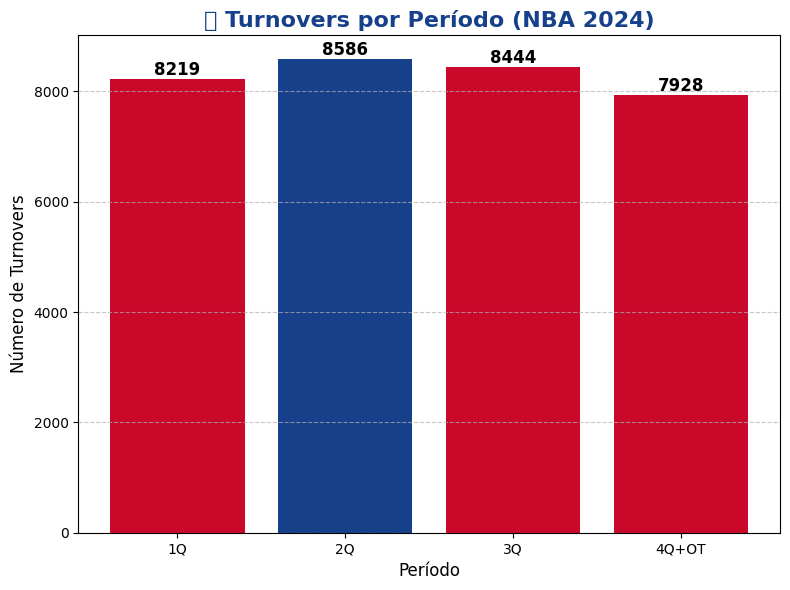

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========== | Variáveis | ============ #
periodos = ['1Q', '2Q', '3Q', '4Q', 'OT1', 'OT2', 'OT3', 'OT4', 'OT5']
df = pd.read_excel('NBA_Temporada_2024.xlsx')

# =========== | Principal | ============ #

# Filtrar apenas os períodos relevantes
df_periodos = df[df['Periodo'].isin(periodos)]

# Filtrar apenas turnovers
df_turnovers = df_periodos[df_periodos['Lance'].str.contains('Turnover', case=False, na=False)]

# Garantir que 'Dados da Casa' e 'Dados do Visitante' sejam numéricos
df_turnovers['Dados da Casa'] = pd.to_numeric(df_turnovers['Dados da Casa'], errors='coerce')
df_turnovers['Dados do Visitante'] = pd.to_numeric(df_turnovers['Dados do Visitante'], errors='coerce')

# Somar turnovers para cada período (casa + visitante)
turnovers_por_periodo = (
    df_turnovers
    .groupby('Periodo')[['Dados da Casa', 'Dados do Visitante']]
    .sum()
    .sum(axis=1)  # Soma os turnovers da casa e visitante para cada período
)

# Agrupar todos os OT juntos com o 4Q
turnovers_4Q_OT = (
    turnovers_por_periodo.get('4Q', 0) +
    turnovers_por_periodo.filter(like='OT').sum()
)

# Dados finais para plot
periodos_finais = ['1Q', '2Q', '3Q', '4Q+OT']
valores_finais = [
    turnovers_por_periodo.get('1Q', 0),
    turnovers_por_periodo.get('2Q', 0),
    turnovers_por_periodo.get('3Q', 0),
    turnovers_4Q_OT
]

# Descobrir o maior valor para colorir em azul
max_val = max(valores_finais)
colors = ['#17408B' if v == max_val else '#C9082A' for v in valores_finais]

# =========== | Gráfico | ============ #
plt.figure(figsize=(8, 6))
bars = plt.bar(periodos_finais, valores_finais, color=colors)

plt.title('🏀 Turnovers por Período (NBA 2024)', fontsize=16, color='#17408B', weight='bold')
plt.xlabel('Período', fontsize=12)
plt.ylabel('Número de Turnovers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 5,
        f'{int(yval)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


### ✅ CONCLUSÃO

O 2º quarto (2Q) concentra o maior número de turnovers na temporada, refletindo fatores táticos, estratégicos e físicos que afetam o controle de bola nesse momento do jogo:

* **Pressão defensiva elevada → próximo ao intervalo as equipes intensificam traps e marcações agressivas para desestabilizar o adversário.**

* **Rotação de jogadores → muitas substituições entram nesse período; reservas ainda “pegando ritmo” provocam falhas de passe e drible.**

* **Desgaste inicial → o primeiro desgaste físico do jogo já afeta a concentração, aumentando erros de execução técnica.**


* **Por outro lado, a análise também permite identificar equipes com menor capacidade de conversão nos momentos finais, sinalizando possíveis dificuldades em sustentar o desempenho ofensivo em situações críticas.Em conjunto, essas condições fazem do 2Q o período de maior vulnerabilidade à perda de posse, sinalizando que trabalhos específicos de tomada de decisão sob pressão e entrosamento em rotações podem reduzir turnovers nos momentos críticos.**




#  A vantagem no número de rebotes está associada à vitória no jogo?


### 💻 CÓDIGO


C:\Users\Jp\AppData\Local\Temp\ipykernel_5100\13595073.py:39: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


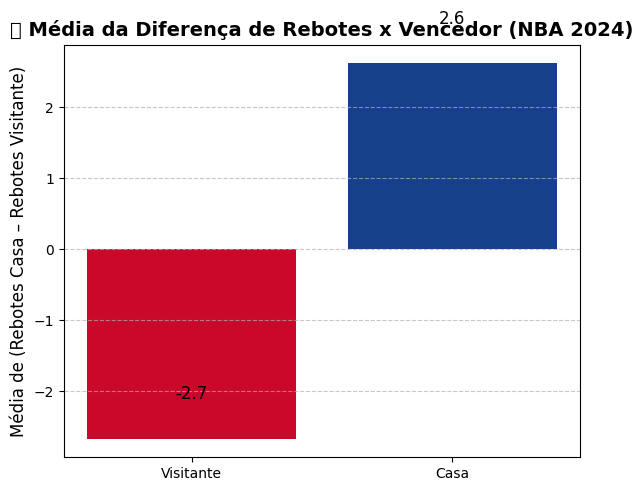

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========== | Carregar dados | ============ #
df = pd.read_excel('NBA_Temporada_2024.xlsx')

# =========== | Filtrar apenas período ALL e Rebounds | ============ #
df_all = df[df['Periodo'] == 'ALL']
df_rebotes = df_all[df_all['Lance'].str.contains('Rebounds', case=False, na=False)].copy()

# =========== | Converter para numérico e renomear | ============ #
df_rebotes['Rebotes_Casa'] = pd.to_numeric(df_rebotes['Dados da Casa'], errors='coerce')
df_rebotes['Rebotes_Visitante'] = pd.to_numeric(df_rebotes['Dados do Visitante'], errors='coerce')

# =========== | Calcular diferença de rebotes e identificar vencedor | ============ #
df_rebotes['Diferenca_Rebotes'] = df_rebotes['Rebotes_Casa'] - df_rebotes['Rebotes_Visitante']
df_rebotes['Time_Vencedor'] = df_rebotes['Resultado'].apply(lambda x: 'Casa' if 'Vitória Casa' in x else 'Visitante')

# =========== | Agrupar por vencedor e calcular média de diferença | ============ #
media_diff = df_rebotes.groupby('Time_Vencedor')['Diferenca_Rebotes'].mean()

# =========== | Preparar dados para plot | ============ #
labels = ['Visitante', 'Casa']
values = [media_diff.get('Visitante', 0), media_diff.get('Casa', 0)]
colors = ['#C9082A', '#17408B']  # vermelho para visitante, azul para casa

# =========== | Gráfico de barras | ============ #
plt.figure(figsize=(6,5))
bars = plt.bar(labels, values, color=colors)
plt.title('🏀 Média da Diferença de Rebotes x Vencedor (NBA 2024)', fontsize=14, weight='bold')
plt.ylabel('Média de (Rebotes Casa – Rebotes Visitante)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# anotar valores
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


## ✅ CONCLUSÃO
**O domínio dos rebotes demonstrou forte correlação com a vitória, especialmente para os times mandantes, reforçando a importância do controle da posse de bola em partidas decisivas.**

* **Média de diferença de rebotes mais alta para mandantes → rebotes são um fator ainda mais crítico jogando em casa.**

* **Mediana consistente → tendência central forte de que, quando ganham mais rebotes, os mandantes tendem a vencer.**

* **Moda elevada → em boa parte dos jogos, a diferença de rebotes favorável ao mandante foi o cenário mais frequente nas vitórias.**

* **Baixo desvio padrão → pouca variação: quando dominam rebotes em casa, geralmente mantêm a vantagem constante.**

**Por outro lado, times visitantes, mesmo vencendo, tendem a apresentar diferenças menores em rebotes, sugerindo que precisam compensar em outras áreas (eficiência ofensiva, defesa forte, controle de ritmo).**

* **Média de rebotes menor para visitantes → rebote é importante, mas não o único caminho para a vitória fora de casa.**

* **Maior variação nos visitantes → indica que ganhar rebotes fora de casa é menos determinante e mais instável.**

#  Agrupar os times da NBA com base no número médio de pontos e número médio de rebotes, para identificar perfis de times ofensivos e defensivos


### 💻 CÓDIGO


Lance                   Field goals   Rebounds  Cluster           Perfil
Time                                                                    
Atlanta Hawks             43.365854  44.512195        2        Dominante
Boston Celtics            41.617284  45.271605        2        Dominante
Brooklyn Nets             37.686747  41.493976        1  Ofensivo Frágil
Charlotte Hornets         38.317073  45.195122        1  Ofensivo Frágil
Chicago Bulls             43.207317  45.865854        2        Dominante
Cleveland Cavaliers       44.578313  45.445783        2        Dominante
Dallas Mavericks          41.987805  43.048780        0        Defensivo
Denver Nuggets            45.414634  45.743902        2        Dominante
Detroit Pistons           42.719512  44.756098        2        Dominante
Golden State Warriors     40.756098  45.378049        1  Ofensivo Frágil
Houston Rockets           42.487805  48.475610        2        Dominante
Indiana Pacers            43.481928  42.012048     

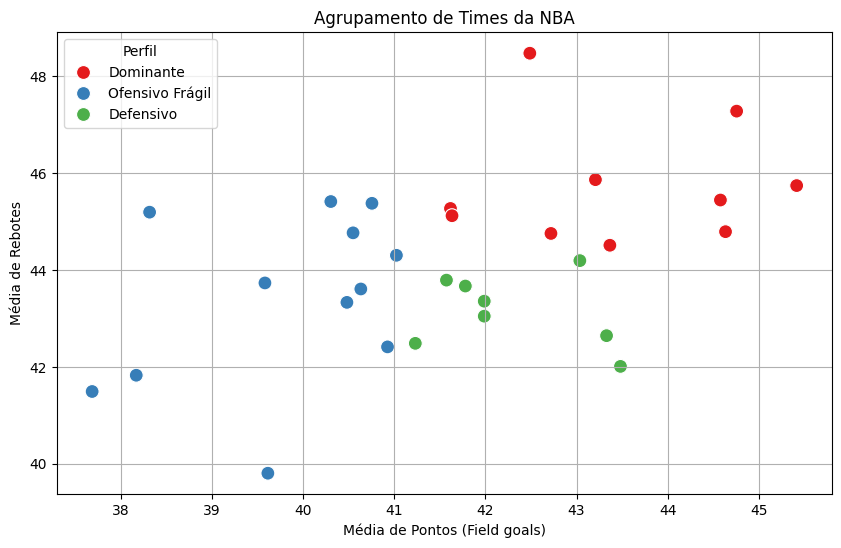

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('NBA_Temporada_2024.xlsx')  



df = df[df['Periodo'] == 'ALL']



def extrair_dados(df, time_col, dados_col):
    df_filtrado = df[['Lance', time_col, dados_col]].copy()
    df_filtrado.rename(columns={time_col: 'Time', dados_col: 'Valor'}, inplace=True)
    return df_filtrado

df_casa = extrair_dados(df, 'Time Casa', 'Dados da Casa')
df_visitante = extrair_dados(df, 'Time Visitante', 'Dados do Visitante')


df_final = pd.concat([df_casa, df_visitante])


def converter_valores(valor):
    try:
        if isinstance(valor, str) and '/' in valor:
            feitos, tentados = valor.split('/')
            return int(feitos)
        else:
            return int(valor)
    except:
        return None

df_final['Valor'] = df_final['Valor'].apply(converter_valores)


pivot = df_final.pivot_table(index='Time', columns='Lance', values='Valor', aggfunc='mean')


pivot = pivot[['Field goals', 'Rebounds']].dropna()


kmeans = KMeans(n_clusters=3, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(pivot[['Field goals', 'Rebounds']])


def nomear_cluster(row):
    if row['Cluster'] == 0:
        return 'Defensivo'
    elif row['Cluster'] == 1:
        return 'Ofensivo Frágil'
    elif row['Cluster'] == 2:
        return 'Dominante'

pivot['Perfil'] = pivot.apply(nomear_cluster, axis=1)


print(pivot)


plt.figure(figsize=(10,6))
sns.scatterplot(data=pivot, x='Field goals', y='Rebounds', hue='Perfil', palette='Set1', s=100)
plt.title('Agrupamento de Times da NBA')
plt.xlabel('Média de Pontos (Field goals)')
plt.ylabel('Média de Rebotes')
plt.grid(True)
plt.show()

## ✅ CONCLUSÃO

* **🟥 Times Dominantes**
**São times que pontuam muito (Field Goals altos) e pegam muitos rebotes.**

***Exemplos: Boston Celtics, Denver Nuggets, Cleveland Cavaliers, Houston Rockets, Memphis Grizzlies...***

**Característica: força ofensiva e domínio no garrafão.**

**👉 Provavelmente, esses times conseguem controlar o ritmo do jogo tanto no ataque quanto na defesa, pois rebotes indicam controle de bola.**

* **🟦 Times Ofensivos Frágeis** 
**São times que fazem menos pontos (Field Goals baixos) e pegam rebotes medianos ou baixos.**

**Exemplos: Brooklyn Nets, Charlotte Hornets, Miami Heat, Orlando Magic, Washington Wizards...**

**Característica: falta de poder de finalização e dificuldade em ganhar a posse.**

**👉 Esses times podem marcar pontos, mas sofrem mais na defesa (menos rebotes, menos controle).**

* **🟩 Times Defensivos**
**São times que têm pontuação média mas muitos rebotes — ou que focam mais em jogo defensivo.**

**Exemplos: Dallas Mavericks, Indiana Pacers, Los Angeles Clippers, Milwaukee Bucks, New York Knicks...**

**Característica: prioridade em defesa e controle de posse, mas talvez precisem melhorar a eficiência ofensiva.**

**👉 Jogam de maneira estratégica, segurando o adversário, mas nem sempre têm ataque forte.**